<a href="https://colab.research.google.com/github/alec-carawan/Intro-to-Machine-Learning/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
cancerURL    =  'https://raw.githubusercontent.com/alec-carawan/datasets/main/cancer.csv'
diabetesURL  =  'https://raw.githubusercontent.com/alec-carawan/datasets/main/diabetes.csv'

diabetesSet  =  pd.read_csv(diabetesURL)
cancerSet    =  pd.read_csv(cancerURL)

cancerSet.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#id is a useless variable when diagnosing cancer, it should be removed from the dataset
cancerSet.pop('id')

#cancer set also has an extra column of NaN values, this should be removed
cancerSet = cancerSet.drop(cancerSet.columns[-1], axis = 1)
cancerSet.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

diabetesTrain, diabetesTest = train_test_split(diabetesSet, train_size = 0.8, test_size = 0.2, random_state = 100)

cancerTrain, cancerTest = train_test_split(cancerSet, train_size = 0.8, test_size = 0.2, random_state = 100)

In [6]:
#standardize M/B to 1/0

cancerTrain['diagnosis'] = cancerTrain['diagnosis'].map({'M': 1, 'B': 0})
cancerTest['diagnosis'] = cancerTest['diagnosis'].map({'M': 1, 'B': 0})

cancerTrain.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
58,0,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
554,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.023430,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.16200,0.243900,0.06493,0.2372,0.07242
351,1,15.75,19.22,107.10,758.6,0.12430,0.23640,0.291400,0.124200,0.2375,...,17.36,24.17,119.40,915.3,0.1550,0.50460,0.687200,0.21350,0.4245,0.10500
136,0,11.71,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.026000,0.1339,...,13.33,25.48,86.16,546.7,0.1271,0.10280,0.104600,0.06968,0.1712,0.07343
497,0,12.47,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,...,14.06,24.34,92.82,607.3,0.1276,0.25060,0.202800,0.10530,0.3035,0.07661


In [7]:
#STANDARDIZE DATA

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#using num_vars keeps data types as data frames, instead of np arrays which do not allow pop and head functions

diabetesTrain[num_vars]  =  scaler.fit_transform(diabetesTrain[num_vars])
diabetesTest[num_vars]   =  scaler.fit_transform(diabetesTest[num_vars])

#probably a more efficient way to do this but I was unable to figure one out
num_vars = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
            'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
            'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se',
            'area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
            'symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
            'perimeter_worst','area_worst','smoothness_worst','compactness_worst',
            'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

cancerTrain[num_vars]    =  scaler.fit_transform(cancerTrain[num_vars])
cancerTest[num_vars]     =  scaler.fit_transform(cancerTest[num_vars])

cancerTrain.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
58,0.0,0.287236,0.308997,0.268261,0.162895,0.252505,0.063386,0.001621,0.020711,0.450980,...,0.250099,0.263428,0.233758,0.144813,0.210079,0.033588,0.001474,0.038271,0.207650,0.051489
554,0.0,0.279190,0.641522,0.267501,0.157419,0.258193,0.133073,0.145150,0.116451,0.300654,...,0.236602,0.627530,0.225541,0.135443,0.349997,0.130696,0.194808,0.223665,0.191732,0.113997
351,1.0,0.415022,0.305882,0.437496,0.261134,0.647016,0.743168,0.682755,0.617296,0.781343,...,0.374355,0.315250,0.404895,0.240893,0.569381,0.463089,0.548882,0.735446,0.636731,0.327693
136,0.0,0.223816,0.217647,0.213738,0.118913,0.473684,0.142353,0.084161,0.129225,0.165775,...,0.214371,0.350607,0.209813,0.119275,0.379882,0.073260,0.083546,0.240028,0.034925,0.120622
497,0.0,0.259785,0.239792,0.253334,0.142900,0.330866,0.194918,0.084560,0.117744,0.276887,...,0.243351,0.319838,0.248900,0.139270,0.383278,0.216656,0.161981,0.362728,0.349252,0.141480


In [8]:
#divide training and test sets into input data and results
diabetesTrainY  =  diabetesTrain.pop('Outcome')
diabetesTrainX  =  diabetesTrain
diabetesTestY   =  diabetesTest.pop('Outcome')
diabetesTestX   =  diabetesTest

cancerTrainY    =  cancerTrain.pop('diagnosis')
cancerTrainX    =  cancerTrain
cancerTestY     =  cancerTest.pop('diagnosis')
cancerTestX     =  cancerTest

Question 1:

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report the classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.

In [9]:
#fit with logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(diabetesTrainX, diabetesTrainY)

diabetesPred = classifier.predict(diabetesTestX)
print(diabetesPred)

[0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0]


In [10]:
#build confusion matrix

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(diabetesTestY, diabetesPred)
cnf_matrix

array([[88, 13],
       [29, 24]])

In [11]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

from sklearn import metrics
accuracy   =  metrics.accuracy_score(diabetesTestY, diabetesPred)
precision  =  metrics.precision_score(diabetesTestY, diabetesPred)
recall     =  metrics.recall_score(diabetesTestY, diabetesPred)
F1         =  2 * precision * recall / (precision + recall)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",F1)

Accuracy: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.4528301886792453
F1 Score: 0.5333333333333334


Text(0.5, 427.9555555555555, 'Predicted label')

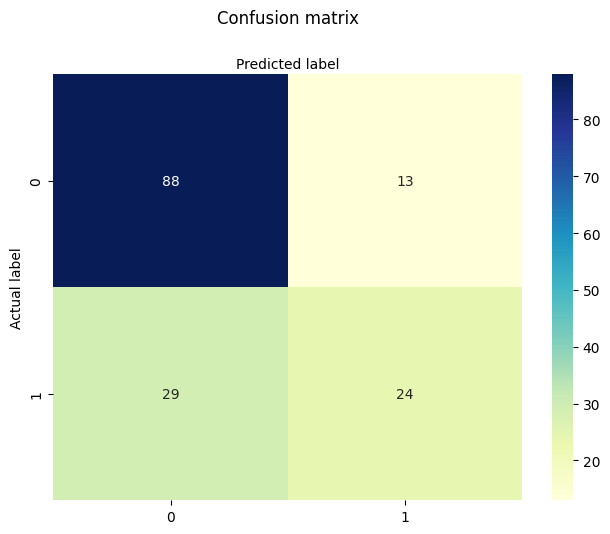

In [12]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Question 2a:

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your classification accuracy over iterations. Also, report your results, including accuracy, precision, recall, and F1 score. At the end, plot the confusion matrix representing your binary classifier.

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(cancerTrainX, cancerTrainY)

cancerPred = classifier.predict(cancerTestX)
print(cancerPred)

[1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [14]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(cancerTestY, cancerPred)
cnf_matrix

array([[65,  0],
       [ 8, 41]])

In [15]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

from sklearn import metrics
accuracy   =  metrics.accuracy_score(cancerTestY, cancerPred)
precision  =  metrics.precision_score(cancerTestY, cancerPred)
recall     =  metrics.recall_score(cancerTestY, cancerPred)
F1         =  (2 * precision * recall) / (precision + recall)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",F1)

Accuracy: 0.9298245614035088
Precision: 1.0
Recall: 0.8367346938775511
F1 Score: 0.9111111111111111


Text(0.5, 427.9555555555555, 'Predicted label')

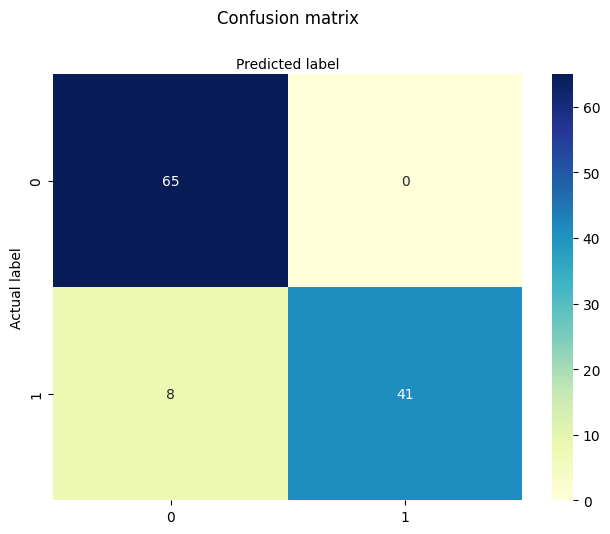

In [16]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Question 2b:

How about adding a weight penalty here, considering the number of parameters? Add the weight penalty repeat the training, and report the results.

In [17]:
#add penalty

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(cancerTrainX, cancerTrainY)
    print('C:', c)
    print('Training accuracy:', clf.score(cancerTrainX, cancerTrainY))
    print('Test accuracy:    ', clf.score(cancerTestX, cancerTestY))
    print('')

C: 10
Training accuracy: 0.9934065934065934
Test accuracy:     0.9473684210526315

C: 1
Training accuracy: 0.9692307692307692
Test accuracy:     0.9298245614035088

C: 0.1
Training accuracy: 0.9296703296703297
Test accuracy:     0.9035087719298246

C: 0.001
Training accuracy: 0.6417582417582418
Test accuracy:     0.5701754385964912



In [18]:
'''from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#convert data frames into arrays
X = cancerTrainX  #.values to convert to array
y = cancerTrainY  #.values to convert to array

model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=KFold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))'''

'from sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\n\n#convert data frames into arrays\nX = cancerTrainX  #.values to convert to array\ny = cancerTrainY  #.values to convert to array\n\nmodel = LogisticRegression(solver=\'liblinear\')\nresults = cross_val_score(model, X, y, cv=KFold)\n# Output the accuracy. Calculate the mean and std across all folds.\nprint("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))'

Question 3:

Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test). Report your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in Problem 2.

In [19]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

gaussX = cancerTrainX
gaussY = cancerTrainY

model.fit(gaussX, gaussY)
# make predictions
expected = gaussY
predicted = model.predict(gaussX)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       292
         1.0       0.92      0.90      0.91       163

    accuracy                           0.94       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455

[[279  13]
 [ 16 147]]


Question 2 results:

Accuracy: 0.9298245614035088

Precision: 1.0

Recall: 0.8367346938775511

F1 Score: 0.9111111111111111


The Naive Bayes classification provides superior accuracy, recall, and F1 score. The logistic regression model achieved better precision.

Question 4:

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Report your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare them against problems 2 and 3.



In [20]:
df = pd.read_csv(cancerURL)

#id is a useless variable when diagnosing cancer, it should be removed from the dataset
df.pop('id')

#cancer set also has an extra column of NaN values, this should be removed
df = df.drop(df.columns[-1], axis = 1)

In [21]:
from sklearn.preprocessing import StandardScaler
features = ['radius_mean','texture_mean','perimeter_mean','area_mean',
  'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
  'symmetry_mean','fractal_dimension_mean','radius_se','texture_se',
  'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
  'concave points_se','symmetry_se','fractal_dimension_se','radius_worst',
  'texture_worst','perimeter_worst','area_worst','smoothness_worst',
  'compactness_worst','concavity_worst','concave points_worst','symmetry_worst',
  'fractal_dimension_worst']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['diagnosis']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [23]:
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)

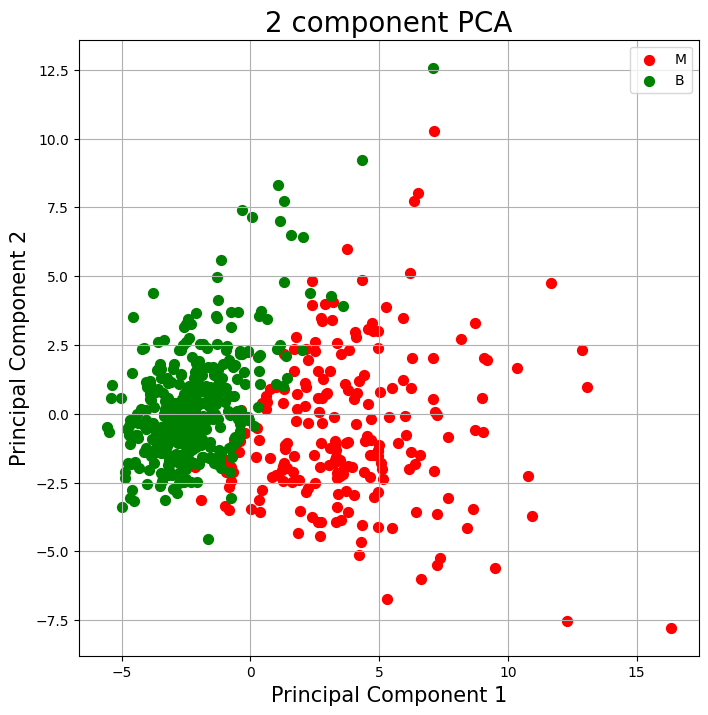

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M',  'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Question 5:

Can you repeat problem 4? This time, replace  logistic regression with the Bayes classifier. Report your results (classification accuracy, precision, recall and F1 score). Compare your results against problems 2, 3 and 4.

In [25]:
df = pd.read_csv(cancerURL)

#id is a useless variable when diagnosing cancer, it should be removed from the dataset
df.pop('id')

#cancer set also has an extra column of NaN values, this should be removed
df = df.drop(df.columns[-1], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

gaussX = df.loc[:, features].values
gaussY = df.loc[:, ['diagnosis']].values

model.fit(gaussX, gaussY)
# make predictions
expected = gaussY
predicted = model.predict(gaussX)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           B       0.94      0.97      0.95       357
           M       0.95      0.89      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[347  10]
 [ 23 189]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(gaussX)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742


In [28]:
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)

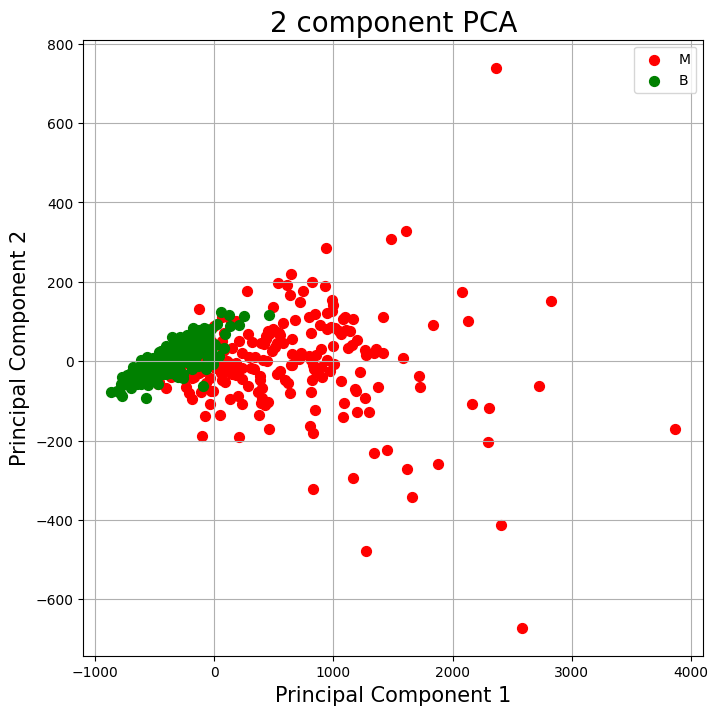

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M',  'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()